In [2]:
# read in some helpful libraries
import nltk # the natural langauage toolkit, open-source NLP
import pandas as pd # dataframes
import numpy as np 
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from collections import Counter

# initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [3]:
### Read our train data into a dataframe
texts = pd.read_csv("train.csv", encoding = 'latin-1')
texts.head()

,id,text,author
0,id26305,"This process, however, afforded me no means of...",EAP
1,id17569,It never once occurred to me that the fumbling...,HPL
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP
3,id27763,How lovely is spring As we looked from Windsor...,MWS
4,id12958,"Finding nothing else, not even gold, the Super...",HPL


In [19]:
# make a copy of texts to work with
texts_len = texts

# add the sentence length for each row
texts_len['sentence_len'] = [len(str.split(s)) for s in texts['text']]
texts_len.head()

,id,text,author,sentence_len
0,id26305,"This process, however, afforded me no means of...",EAP,41
1,id17569,It never once occurred to me that the fumbling...,HPL,14
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP,36
3,id27763,How lovely is spring As we looked from Windsor...,MWS,34
4,id12958,"Finding nothing else, not even gold, the Super...",HPL,27


In [46]:
# get summary data for each author on the sentence length
sentence_summary = pd.DataFrame(texts_len.groupby('author')['sentence_len'].describe())
sentence_summary

,count,mean,std,min,25%,50%,75%,max
author,,,,,,,,
EAP,185.0,25.686486,20.534941,4.0,11.0,19.0,36.00,93.0
HPL,156.0,27.461538,12.716453,5.0,17.0,26.0,34.25,69.0
MWS,158.0,27.113924,16.080203,4.0,16.0,23.0,34.00,104.0


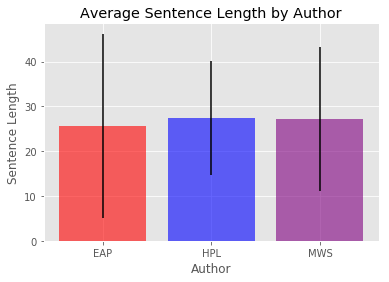

In [62]:
# plot

plt.bar(np.arange(3), sentence_summary['mean'], yerr=sentence_summary['std'], color = ['red', 'blue', 'purple'], alpha = 0.6)
plt.xticks(np.arange(3), sentence_summary.index)
plt.title("Average Sentence Length by Author")
plt.xlabel("Author")
plt.ylabel("Sentence Length")
plt.show()